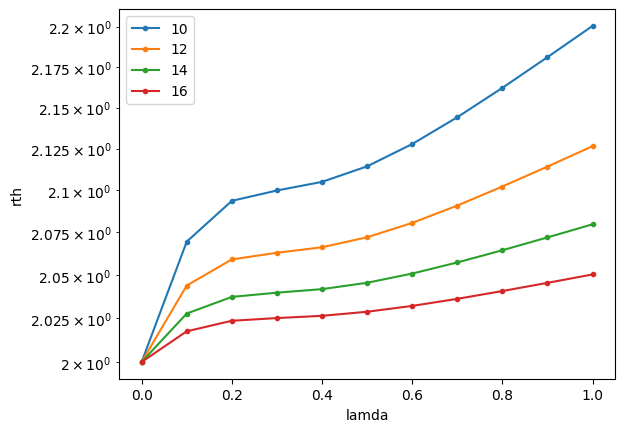

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf,erfc

class PS_PAM:
    def __init__(self, M, lamda, Es_N0_dB):
        self.M = M
        self.lamda = lamda
        self.Es_N0 = 10**(Es_N0_dB / 10)
        self.p_xm = self.find_p()
        self.Epsilon = self.compute_Epsilon()
        self.rth = self.Find_rth()

    def Q_function(self, value):
        return 0.5 - 0.5*erf(value/np.sqrt(2))

    def Symbol_ERR(self):
        ser = 0
        for i in range(1, self.M):
            ser += 2*self.p_xm[i - 1]*self.Q_function((1 + (2*i - self.M)*self.Epsilon/self.Es_N0*self.lamda)*np.sqrt(2*self.Es_N0/self.Epsilon))
        return ser
    def find_p(self):
        p_xm = np.zeros(self.M)
        SIGMA = 0
        for i in range(1, self.M + 1):
            SIGMA += np.exp(-(2*i - 1 - self.M)**2 * self.lamda)
        for i in range(1, self.M + 1):
            p_xm[i - 1] = np.exp(-(2*i - 1 - self.M)**2 * self.lamda) / SIGMA
        return p_xm

    def compute_Epsilon(self):
        Av = 0
        for i in range(1, self.M + 1):
            Av += (2*i - 1 - self.M)**2 * self.p_xm[i - 1]
        return Av

    def Find_rth(self):
        rth = np.zeros(self.M - 1)
        for i in range(1, self.M):
            rth[i - 1] = (2*i - self.M) * (1 + self.Epsilon / self.Es_N0 * self.lamda)
        return rth


# #[0.00265771 0.02929643 0.14510616 0.3229397  0.3229397  0.14510616 p_xm
#  0.02929643 0.00265771]
# [-6.29898405 -4.1993227  -2.09966135  0.          2.09966135  4.1993227 r_th
#   6.29898405]
M = 4
Es_N0_dB=np.arange(10,18,2)
lamda = np.arange(0,1.1,0.1)
rth = np.zeros(len(lamda))
for i in range(len(Es_N0_dB)):
    for j in range(len(lamda)):
      rth[j] = PS_PAM(M,lamda[j],Es_N0_dB[i]).rth[M-2]
    plt.semilogy(lamda,rth,'.-',label=Es_N0_dB[i])

plt.xlabel('lamda')
plt.ylabel('rth')
plt.legend()
plt.show()


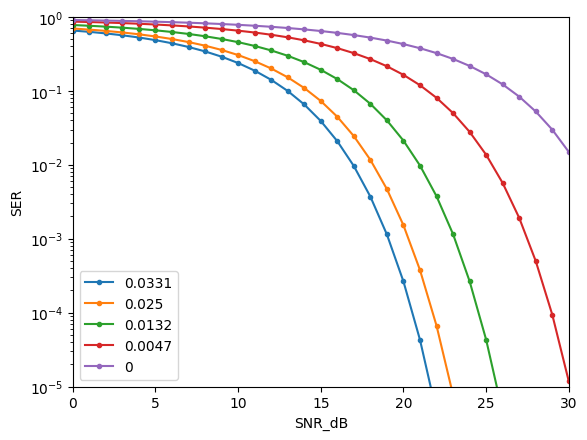

In [ ]:
M=32
lamda=[0.0331, 0.0250, 0.0132, 0.0047,0]
Es_N0_dB=np.arange(0,31)
SER=np.zeros(len(Es_N0_dB))

for i in range(len(lamda)):
  for j in range(len(Es_N0_dB)):
    SER[j]=PS_PAM(M,lamda[i],Es_N0_dB[j]).Symbol_ERR()
  plt.semilogy(Es_N0_dB,SER,'.-',label=lamda[i])

plt.axis([0,30, 1e-5, 1])
plt.legend()
plt.xlabel('SNR_dB')
plt.ylabel('SER')
plt.show()